In [6]:
import os
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import seaborn as sns
from scipy import stats
import sys
sys_path="d:\\software\\python3\\lib\\site-packages"
sys.path.append(sys_path)
chang_path="D:/中南财经政法大学/课程资料 class info/金融计量/参考数据"
os.chdir(chang_path)
import warnings
warnings.filterwarnings("ignore")


In [7]:
whole_data=pd.read_csv("whole_data_female.csv")
df=whole_data[['TotalSalary','Female','Age','Female_board_per', 'tobinq', 'asset', 'roa', 'debt_asset', 'IsDuality']]
df.head()


,TotalSalary,Female,Age,Female_board_per,tobinq,asset,roa,debt_asset,IsDuality
0,4980000.0,0.0,64.0,0.000000,1.060375,2.605763e+11,0.005396,0.975153,1
1,4980000.0,0.0,65.0,0.071429,1.164319,3.525394e+11,0.008641,0.963107,1
2,4210000.0,0.0,59.0,0.071429,1.164319,3.525394e+11,0.008641,0.963107,0
3,4980000.0,0.0,65.0,0.071429,1.024772,4.744402e+11,0.001485,0.965431,1
4,4180000.0,0.0,60.0,0.071429,1.024772,4.744402e+11,0.001485,0.965431,0


In [8]:
df["TotalSalary"] = (df["TotalSalary"]+1).apply(np.log1p)
df["asset"] = (df["asset"]+1).apply(np.log1p)
df=df.dropna()
#数据初步处理

In [9]:
summary_stats1=df.describe(percentiles=[0.01,0.25,0.75, 0.99])
summary_stats1 = summary_stats1.T ##转置方便看结果
summary_stats1

,count,mean,std,min,1%,25%,50%,75%,99%,max
TotalSalary,35958.0,12.837254,2.045179,0.693147,0.693147,12.572457,13.122367,13.630117,15.420941,15.420941
Female,35958.0,0.061655,0.240532,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
Age,35958.0,48.805579,6.469354,33.000000,33.000000,44.000000,49.000000,53.000000,65.000000,65.000000
Female_board_per,35958.0,0.136450,0.123248,0.000000,0.000000,0.000000,0.111111,0.222222,0.500000,0.500000
tobinq,35958.0,2.193617,1.514426,0.927213,0.927213,1.311606,1.704382,2.460665,10.303706,10.314468
asset,35958.0,21.987056,1.425302,19.306722,19.309720,20.974032,21.761530,22.710551,27.040482,27.069975
roa,35958.0,0.043734,0.067904,-0.269333,-0.266728,0.015064,0.041857,0.077725,0.225832,0.225832
debt_asset,35958.0,0.438795,0.224213,0.047019,0.047085,0.259349,0.427804,0.603414,0.986045,0.988413
IsDuality,35958.0,0.262779,0.440149,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000


In [10]:
with pd.ExcelWriter('Temp_summary.xlsx') as writer:
     summary_stats1.to_excel(writer, sheet_name='Temp_summary')

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [7]:
df=add_constant(df)
#vif = variance_inflation_factor(df.values,1)
vif=pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index=df.columns)
print("VIF的结果如下\n",vif)

VIF的结果如下
 const               376.606711
TotalSalary           1.048473
Female                1.067545
Age                   1.075451
Female_board_per      1.088918
tobinq                1.164198
asset                 1.606324
roa                   1.296923
debt_asset            1.655046
IsDuality             1.097753
dtype: float64


In [12]:
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [13]:
x1 = df[['Female','Age', 'tobinq', 'asset', 'roa', 'debt_asset', 'IsDuality']]
x1 = sm.add_constant(x1) 
y = df['TotalSalary']
#%% 
result = sm.OLS(y, x1, missing="drop").fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalSalary   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     240.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:40:51   Log-Likelihood:                -75928.
No. Observations:               35958   AIC:                         1.519e+05
Df Residuals:                   35950   BIC:                         1.519e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8417      0.201     34.116      0.0

In [14]:
myf_test = result.f_test('(Female = Age*10)')
print(myf_test)
#hypotheses = '(Female = Age)'
myf_test = result.f_test('(Female = 5*Age)')
print(myf_test)

<F test: F=0.1017022085824533, p=0.749798254004753, df_denom=3.6e+04, df_num=1>
<F test: F=3.5255736013307377, p=0.0604370014004747, df_denom=3.6e+04, df_num=1>


In [15]:
result = sm.OLS(y, x1, missing="drop").fit(cov_type='HC3')
print(result.summary())
#异方差稳健标准误

                            OLS Regression Results                            
Dep. Variable:            TotalSalary   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     127.9
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          1.19e-186
Time:                        11:42:48   Log-Likelihood:                -75928.
No. Observations:               35958   AIC:                         1.519e+05
Df Residuals:                   35950   BIC:                         1.519e+05
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8417      0.270     25.321      0.0

In [16]:
x1 = df[['Female','Age', 'tobinq', 'asset', 'roa', 'debt_asset', 'IsDuality']]
x1= sm.add_constant(x1) 
x1['Female_roa'] =x1['Female']*x1['roa'] 
y = df['TotalSalary']
#%% 
result = sm.OLS(y, x1, missing="drop").fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalSalary   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     210.8
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:43:28   Log-Likelihood:                -75925.
No. Observations:               35958   AIC:                         1.519e+05
Df Residuals:                   35949   BIC:                         1.519e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8364      0.201     34.089      0.0

# 2面板数据

In [19]:
whole_data=pd.read_csv("whole_data_female.csv")
df=whole_data[['stkcd','year','TotalSalary','Female','Age','Female_board_per', 'tobinq', 'asset', 'roa', 'debt_asset', 'IsDuality']]
df = df.set_index(["stkcd", "year"])
df["TotalSalary"] = (df["TotalSalary"]+1).apply(np.log1p)
df["asset"] = (df["asset"]+1).apply(np.log1p)
df=df.dropna()
df.head()

TotalSalary  Female   Age  Female_board_per    tobinq      asset  \
stkcd year                                                                     
1     2006    15.420941     0.0  64.0          0.000000  1.060375  26.286161   
      2007    15.420941     0.0  65.0          0.071429  1.164319  26.588428   
      2007    15.252974     0.0  59.0          0.071429  1.164319  26.588428   
      2008    15.420941     0.0  65.0          0.071429  1.024772  26.885401   
      2008    15.245822     0.0  60.0          0.071429  1.024772  26.885401   

                 roa  debt_asset  IsDuality  
stkcd year                                   
1     2006  0.005396    0.975153          1  
      2007  0.008641    0.963107          1  
      2007  0.008641    0.963107          0  
      2008  0.001485    0.965431          1  
      2008  0.001485    0.965431          0

In [20]:
from linearmodels.panel import PooledOLS



In [21]:
x1 = df[['Female','Age', 'tobinq', 'asset', 'roa', 'debt_asset', 'IsDuality']]
x1 = sm.add_constant(x1) 
y = df['TotalSalary']

mod = PooledOLS(y, x1)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:            TotalSalary   R-squared:                        0.0447
Estimator:                  PooledOLS   R-squared (Between):              0.1011
No. Observations:               35958   R-squared (Within):               0.0230
Date:                Thu, Dec 14 2023   R-squared (Overall):              0.0447
Time:                        11:50:03   Log-likelihood                -7.593e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      240.07
Entities:                        3841   P-value                           0.0000
Avg Obs:                       9.3616   Distribution:                 F(7,35950)
Min Obs:                       0.0000                                           
Max Obs:                       26.000   F-statistic (robust):             240.07
                            

In [22]:
from linearmodels.panel import RandomEffects

mod = RandomEffects(y, x1)
RE_Result = mod.fit()
print(RE_Result)

                        RandomEffects Estimation Summary                        
Dep. Variable:            TotalSalary   R-squared:                        0.2961
Estimator:              RandomEffects   R-squared (Between):              0.0674
No. Observations:               35958   R-squared (Within):               0.0319
Date:                Thu, Dec 14 2023   R-squared (Overall):              0.0401
Time:                        11:50:22   Log-likelihood                -7.209e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2160.4
Entities:                        3841   P-value                           0.0000
Avg Obs:                       9.3616   Distribution:                 F(7,35950)
Min Obs:                       0.0000                                           
Max Obs:                       26.000   F-statistic (robust):             192.87
                            

In [23]:
from linearmodels.panel import PanelOLS

Fix_effect_mod = PanelOLS(y, x1, entity_effects=True, time_effects=True)
fe_te_res = Fix_effect_mod.fit()
print(fe_te_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:            TotalSalary   R-squared:                        0.0142
Estimator:                   PanelOLS   R-squared (Between):             -0.0177
No. Observations:               35958   R-squared (Within):               0.0350
Date:                Thu, Dec 14 2023   R-squared (Overall):              0.0277
Time:                        11:50:42   Log-likelihood                 -6.94e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      66.172
Entities:                        3841   P-value                           0.0000
Avg Obs:                       9.3616   Distribution:                 F(7,32098)
Min Obs:                       0.0000                                           
Max Obs:                       26.000   F-statistic (robust):             66.172
                            

In [24]:
Fix_effect_mod = PanelOLS(y, x1, entity_effects=True, time_effects=True)
fe_te_res = Fix_effect_mod.fit(cov_type="clustered", cluster_entity=True)
print(fe_te_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:            TotalSalary   R-squared:                        0.0142
Estimator:                   PanelOLS   R-squared (Between):             -0.0177
No. Observations:               35958   R-squared (Within):               0.0350
Date:                Thu, Dec 14 2023   R-squared (Overall):              0.0277
Time:                        11:56:35   Log-likelihood                 -6.94e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      66.172
Entities:                        3841   P-value                           0.0000
Avg Obs:                       9.3616   Distribution:                 F(7,32098)
Min Obs:                       0.0000                                           
Max Obs:                       26.000   F-statistic (robust):             17.079
                            

“unadjusted”, “homoskedastic” - Assume residual are homoskedastic

“robust”, “heteroskedastic” - Control for heteroskedasticity using White’s estimator

“clustered` - One- or two-way clustering. Configuration options are:

clusters - Input containing 1 or 2 variables. Clusters should be integer values, although other types will be coerced to integer values by treating as categorical variables

cluster_entity - Boolean flag indicating to use entity clusters

cluster_time - Boolean indicating to use time clusters

In [19]:
Fix_effect_mod = PanelOLS(y, x1, entity_effects=True, time_effects=True)
fe_te_res = Fix_effect_mod.fit(cov_type="clustered", cluster_entity=True)
hypotheses = "(Female = Age)"
f_test = fe_te_res.wald_test(formula=hypotheses)
print(f_test)



Linear Equality Hypothesis Test
H0: Linear equality constraint is valid
Statistic: 0.0744
P-value: 0.7850
Distributed: chi2(1)


#不要求掌握，大概看一下就好，stata里会更简洁
import numpy.linalg as la
from scipy import stats
import numpy as np
def hausman(fe, re):
 b = fe.params
 B = re.params
 v_b = fe.cov
 v_B = re.cov
df = b[np.abs(b) < 1e8].size
chi2 = np.dot((b — B).T, la.inv(v_b — v_B).dot(b — B)) 
 
 pval = stats.chi2.sf(chi2, df)
return chi2, df, pval
hausman_results = hausman(fe_res, re_res) 
print(‘chi-Squared: ‘ + str(hausman_results[0]))
print(‘degrees of freedom: ‘ + str(hausman_results[1]))
print(‘p-Value: ‘ + str(hausman_results[2]))

# 3 工具变量回归

In [25]:
from statsmodels.sandbox.regression.gmm import IV2SLS
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm

whole_data=pd.read_csv("whole_data_female.csv")
df=whole_data[['TotalSalary','Female','Age','Female_board_per', 'tobinq', 'asset', 'roa', 'debt_asset', 'IsDuality','Female_mng_per','Female_monitor_per']]
df.head()
df["TotalSalary"] = (df["TotalSalary"]+1).apply(np.log1p)
df["asset"] = (df["asset"]+1).apply(np.log1p)
df=df.dropna()



In [26]:
exog_var = df[['Age', 'tobinq', 'asset', 'roa', 'debt_asset','Female_board_per', 'IsDuality']]
iv_var=df[['Female_mng_per','Female_monitor_per']]
mlr2 = lm.IV2SLS(dependent=y, exog=exog_var,  endog=df["Female"], instruments=iv_var).fit()

print(mlr2)
print(mlr2.first_stage)

                          IV-2SLS Estimation Summary                          
Dep. Variable:            TotalSalary   R-squared:                      0.9466
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9466
No. Observations:               35958   F-statistic:                 7.398e+05
Date:                Thu, Dec 14 2023   P-value (F-stat)                0.0000
Time:                        11:57:36   Distribution:                  chi2(8)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
Age                  0.0276     0.0025     10.863     0.0000      0.0226      0.0325
tobinq               0.0965 

In [22]:
print(mlr2.wu_hausman())
#wu_hausman test需要显著才可以通过，反应了加入工具变量后结果有较大改变

print(mlr2.sargan)
#sargan test需要不显著才可以通过，表明不存在过度识别问题，即外生性满足。注意，是至少需要sargan test通过；但即使通过，并不意味着外生性就满足了




Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 95.0898
P-value: 0.0000
Distributed: F(1,35949)
Sargan's test of overidentification
H0: The model is not overidentified.
Statistic: 44.3575
P-value: 0.0000
Distributed: chi2(1)


# 4 DID


1） treat post treat*post
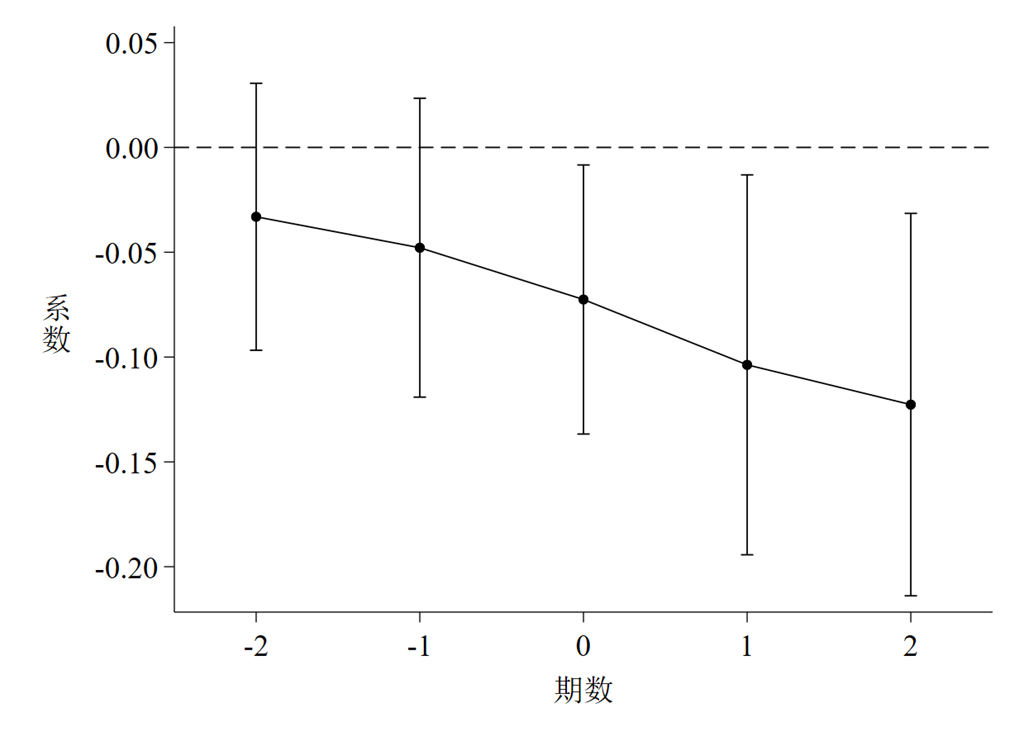
2) treat treat*pre2 treat*pre1 treat*event treat*post1 treat*post2 i.time


# 5  PSM&SC

In [29]:
from psmpy import PsmPy  
from psmpy.functions import cohenD  
from psmpy.plotting import *

In [30]:
whole_data=pd.read_csv("whole_data_female.csv")
df=whole_data[['stkcd','year','TotalSalary','Female','Age','Female_board_per', 'tobinq', 'asset', 'roa', 'debt_asset', 'IsDuality']]
df["TotalSalary"] = (df["TotalSalary"]+1).apply(np.log1p)
df["asset"] = (df["asset"]+1).apply(np.log1p)

df_match_var=df[['year','Female','Age', 'tobinq', 'asset', 'roa', 'debt_asset','Female_board_per', 'IsDuality']]
df_match_var['id'] = df_match_var.index + 1
df_match_var.head()  
df_match_var=df_match_var.query('year==2011 ')
#df_match_var = df_match_var.drop(['yyyy'], axis=1)  #删除a列

In [31]:
psm = PsmPy(df_match_var, treatment='Female', indx='id', exclude = ['year'])
#exclude- （可选）参数，将忽略在模型拟合过程中传递给它的任何协变量（columns）。这将是一个字符串列表。这里不需要传递唯一索引列。

In [32]:
psm.logistic_ps(balance = True)
#计算逻辑倾向得分/logits：

In [33]:
psm.knn_matched_12n(matcher='propensity_logit', how_many=1)
#matcher- propensity_logit（默认）并在上一步中生成的替代选项是propensity_score，进行匹配时将指定参数。
#how_many- 1（默认 1:1 匹配），确定匹配是 1:1 还是 1:n，其中 'n' 是您希望从较小的（treatment类）匹配到较大类的唯一次数

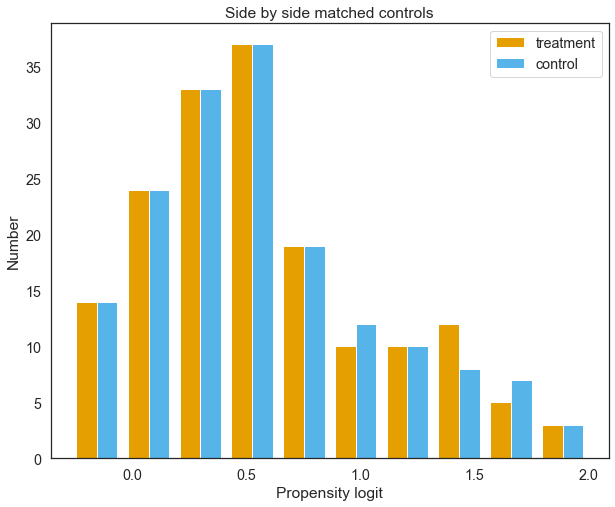

In [34]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number', Xlabel= 'Propensity logit', names = ['treatment', 'control'], 
               save=True)


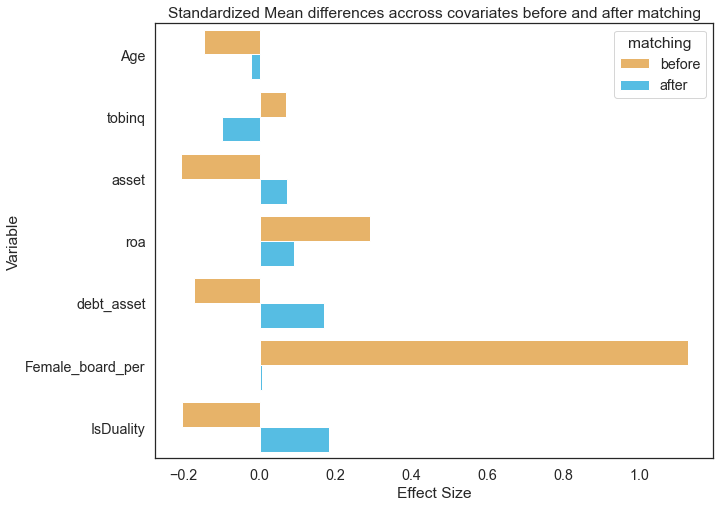

In [29]:
psm.effect_size_plot(save=False)


In [30]:
match_id=psm.matched_ids
print(type(match_id))
match_id

<class 'pandas.core.frame.DataFrame'>


,id,largerclass_0group
0,462,13260
1,529,13700
2,648,11220
3,727,9898
4,1073,29834
...,...,...
162,32982,30530
163,33197,8995
164,33198,17167
165,33373,13373


In [31]:
psm.effect_size


,Variable,matching,Effect Size
0,Age,before,-0.147766
1,Age,after,-0.023146
2,tobinq,before,0.069236
3,tobinq,after,-0.098550
4,asset,before,-0.208536
5,asset,after,0.070667
6,roa,before,0.291141
7,roa,after,0.089081
8,debt_asset,before,-0.174348
9,debt_asset,after,0.170078


# 6 logit probit

In [32]:
from patsy import dmatrices

y,X = dmatrices('Female ~ asset + roa + debt_asset+ Female_board_per',data = df,return_type='dataframe')
#patsy.dmatrices('y ~ x0 + x1 + 0', data) 默认有截距项，加上0表示删去截距
logit = sm.Logit(y,X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.205225
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Female   No. Observations:                36143
Model:                          Logit   Df Residuals:                    36138
Method:                           MLE   Df Model:                            4
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.1131
Time:                        21:38:52   Log-Likelihood:                -7417.5
converged:                       True   LL-Null:                       -8363.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.6790      0.409     -6.543      0.000      -3.481      -1.876
asset      

In [33]:
margeff = results.get_margeff()
print(margeff.summary())


        Logit Marginal Effects       
Dep. Variable:                 Female
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
asset               -0.0038      0.001     -3.595      0.000      -0.006      -0.002
roa                  0.0752      0.020      3.681      0.000       0.035       0.115
debt_asset           0.0172      0.007      2.485      0.013       0.004       0.031
Female_board_per     0.3729      0.010     38.008      0.000       0.354       0.392


In [34]:
probit_model = sm.Probit(y,X)
results = probit_model.fit()
print(results.summary())


Optimization terminated successfully.
         Current function value: 0.204195
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                 Female   No. Observations:                36143
Model:                         Probit   Df Residuals:                    36138
Method:                           MLE   Df Model:                            4
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.1175
Time:                        21:38:52   Log-Likelihood:                -7380.2
converged:                       True   LL-Null:                       -8363.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5008      0.197     -7.631      0.000      -1.886      -1.115
asset      

In [35]:
margeff = results.get_margeff()
print(margeff.summary())


       Probit Marginal Effects       
Dep. Variable:                 Female
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
asset               -0.0039      0.001     -3.838      0.000      -0.006      -0.002
roa                  0.0742      0.020      3.690      0.000       0.035       0.114
debt_asset           0.0175      0.007      2.578      0.010       0.004       0.031
Female_board_per     0.3892      0.010     39.222      0.000       0.370       0.409


# 7 tobit and trunc

In [36]:
from py4etrics.truncreg import Truncreg
from py4etrics.tobit import Tobit
whole_data=pd.read_csv("whole_data_female.csv")
df=whole_data[['Female_mng_per','TotalSalary','Female','Age','Female_board_per', 'tobinq', 'asset', 'roa', 'debt_asset', 'IsDuality',"Female_monitor_per",'Indirect_per']]
df["TotalSalary"] = (df["TotalSalary"]+1).apply(np.log1p)
df["asset"] = (df["asset"]+1).apply(np.log1p)
df=df.dropna()


In [37]:

x1 = df[[ 'asset', 'roa', 'debt_asset',"Female_board_per",'Indirect_per']]
x1 = sm.add_constant(x1) 
y = df['Female_mng_per']

result = sm.OLS(y, x1, missing="drop").fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:         Female_mng_per   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     768.7
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:13:09   Log-Likelihood:                 11167.
No. Observations:               35958   AIC:                        -2.232e+04
Df Residuals:                   35952   BIC:                        -2.227e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3106      0.017  

In [38]:
left = 0
censor = df['Female_mng_per'].apply(lambda x: -1 if x==left else 0)
res_tobit = Tobit.from_formula('Female_mng_per ~ asset + roa + debt_asset+ Female_board_per+ Indirect_per',cens=censor,left=0,data=df).fit()
print(res_tobit.summary())

Optimization terminated successfully.
         Current function value: 0.375338
         Iterations: 783
         Function evaluations: 1170
                              Tobit Regression Results                             
Dep. Variable:              Female_mng_per   Pseudo R-squ:                    0.108
Method:                 Maximum Likelihood   Log-Likelihood:               -13496.4
No. Observations:                    35958   LL-Null:                      -15124.5
No. Uncensored Obs:                  21754   LL-Ratio:                       3256.1
No. Left-censored Obs:               14204   LLR p-value:                     0.000
No. Right-censored Obs:                  0   AIC:                           27004.8
Df Residuals:                        35952   BIC:                           27055.7
Df Model:                                5   Covariance Type:             nonrobust
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------

In [ ]:
df_drop0 = df.query('Female_mng_per > 0')  #仅仅取出df中Female_mng_per大于0的，产生截尾数据

res_trunc = Truncreg.from_formula('Female_mng_per ~ asset + roa + debt_asset+ Female_board_per+ Indirect_per',left=0,data=df_drop0).fit()
print(res_trunc.summary())
